In [1]:
import numpy as np
import matplotlib.pyplot as plt

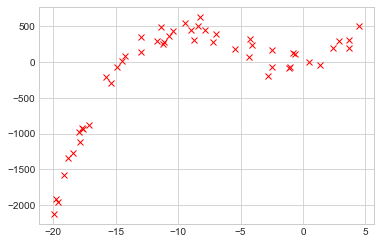

In [2]:
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x =  25*(np.random.rand(number_of_samples, 1)-0.8)
y = 7* x + 15* x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'rx')

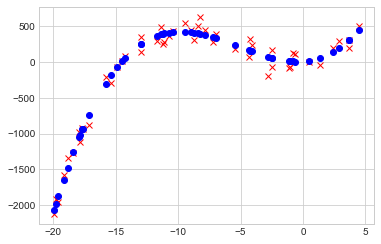

In [3]:
# 1.Please plot the noisy data and the polynomial you found (in the same figure).
# You can use any value of  m selected from 2, 3, 4, 5, 6.
m =  np.random.choice([2, 3, 4, 5, 6])     # random choice for m
polynomial = np.polyfit(x.flatten(),y.flatten(),m)
poly = np.poly1d(polynomial)       # Polynomial created for generating y for each x
plt.plot(x,y,'rx')
plt.plot(x,poly(x),'bo')

In [4]:
#2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 50)
m_values = [1,2,3,4,5,6,7,8]
MSE_training = []
MSE_testing = []

for m in m_values:
    polynomial = np.polyfit(x_train.flatten(),y_train.flatten(),m) # working with training
    y_predict = np.poly1d(polynomial)                             
    MSE = np.square(np.subtract(y_test, y_predict(x_test))).mean() #MSE calculation for testing data 
    MSE_testing.append(MSE)
    MSE_training.append(np.square(np.subtract(y_train, y_predict(x_train))).mean())
    


[Text(0, 0.5, 'MSE'), Text(0, 0.5, 'MSE')]

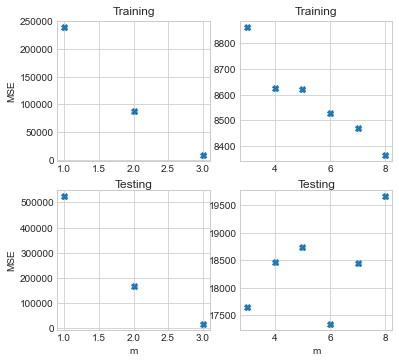

In [5]:
fig,a = plt.subplots(2,2,squeeze=False)
a[0,0].plot(m_values[:3],MSE_training[:3], 'X')
a[0,0].set_title("Training")
a[0,1].plot(m_values[2:],MSE_training[2:], 'X')
a[0,1].set_title("Training")
a[1,0].plot(m_values[:3],MSE_testing[:3], 'X')
a[1,0].set_title("Testing", pad=1.08)
a[1,1].plot(m_values[2:],MSE_testing[2:], 'X')
a[1,1].set_title("Testing",pad = 1.08)
plt.subplots_adjust(top =1.2)
plt.setp(a[-1,:],xlabel = 'm')
plt.setp(a[:,0],ylabel = 'MSE')


In [6]:
#Identify the best choice of m
MSE_diff = []
for m, train, test in zip(m_values, MSE_training, MSE_testing):
    MSE_diff.append((abs(train-test), m))
low_MSE_training = m_values[MSE_training.index(min(MSE_training))]
low_MSE_testing = m_values[MSE_testing.index(min(MSE_testing))]

In [7]:
low_MSE_training

8

In [8]:
low_MSE_testing 

6

In [9]:
print('The best choice for m is:',min(MSE_diff)[1])
print('Difference of MSE is:',min(MSE_diff)[0])

The best choice for m is: 3
Difference of MSE is: 8788.576507393524


Noise scale 	 MSE
150 		 19388.704188606855
200 		 39412.12243849324
400 		 145682.02437662138
600 		 339871.7589515262
1000 		 804474.0226159238


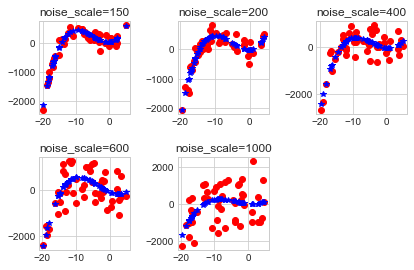

In [10]:
#Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, 
#re-run the algorithm and plot the polynomials with the m found in 2). 
#Discuss the impact of noise scale to the accuracy of the returned parameters.
#[You need to plot a figure like in 1) for each choice of noise_scale.]

noise = [150, 200, 400, 600, 1000]
number_of_samples = 50
m = min(MSE_diff)[1]
MSE_values = []

print('Noise scale \t MSE')
    
for index , noise_scale in enumerate(noise):
    x =  25*(np.random.rand(number_of_samples, 1)-0.8)
    y = 7* x + 15* x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    polynomial = np.polyfit(x.flatten(),y.flatten(),m) 
    y_predict = np.poly1d(polynomial)
    MSE = np.square(np.subtract(y, y_predict(x))).mean()
    MSE_values.append(MSE)

    plt.tight_layout(pad = 1.6, h_pad = None, w_pad = None, rect = None)
    plt.subplot(2,3,index+1)
    plt.plot(x,y,'ro')                 # plotting test data and predicted with m
    plt.plot(x,y_predict(x),'b*')
    plt.title('noise_scale=' + str(noise_scale))
    plt.grid(True)
    print(noise_scale, '\t\t', MSE_values[index])

# 
So,we can observed from the graphs, MSE increases expontially with noise.
we can conclde that the increase in noise scale leads to a massive increase in MSE.
The accuracy for predicted data decreases with increase in noise range. 

Number of samples 	 MSE
40 			 8096.92008435389
30 			 4351.640979275986
20 			 7913.809796359918
10 			 4955.856206446462


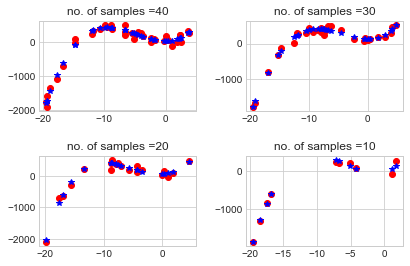

In [12]:
#Change variable number_of_samples to 40, 30, 20, 10 respectively, 
#re-ran the algorithm and plot the polynomials with the m found in 2).
#Discuss the impact of the number of samples to the accuracy of the returned parameters. 
#[You need to plot a figure like in 1) for each choice of number_of_samples.]

noise_scale = 100 # used initially
number_of_samples_list = [40, 30, 20, 10]
m = 4      
MSE_values = []
print('Number of samples \t MSE')
for index, number_of_samples in enumerate(number_of_samples_list):
    x =  25*(np.random.rand(number_of_samples, 1)-0.8)
    y = 7* x + 15* x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    polynomial = np.polyfit(x.flatten(), y.flatten(), m)        
    y_predict = np.poly1d(polynomial)                                  
    MSE = np.square(np.subtract(y, y_predict(x))).mean()     # MSE calculated
    MSE_values.append(MSE)                                # storing MSE for comparison with noise_scale
    #sub plots
    plt.tight_layout(pad=1.8, h_pad=None, w_pad=None, rect=None)
    plt.subplot(2,2,index+1)
    plt.plot(x,y,'ro')
    plt.plot(x,y_predict(x),'b*')
    plt.title('no. of samples =' + str(number_of_samples))
    plt.grid(True)
    print(number_of_samples,'\t\t\t',MSE_values[index])  
    


In the above graphs, we can observe that, MSE increase as the number of sample decreases, inverse relationship between MSE and Number of samples. 

Although, the factor of noise can oppose the effect of decrease in sample numbers.
Also, we can observe that the MSE is Unusually higher or lower than expacted for the corresponding number of samples.

The accuracy of predicted values decreases with decrease in number of sample, especially for very low sample numbers, but the influence of noise might significantly change the result. for very large sample, increase in MSE with decrese in Number of sample of dataset. 
